In [2]:
import tensorflow.keras as keras
import pandas as pd
import numpy as np
import pythainlp as pythai

In [4]:
# data = pd.read_csv('datasets/review_shopping.csv', sep='\t', encoding='utf-8', header=None)
# data = pd.concat([data, pd.read_csv('datasets/general-amy.csv', sep='\t', encoding='utf-8', header=None)])
# data = pd.concat([data, pd.read_csv('datasets/tcas61.csv', sep='\t', encoding='utf-8', header=None)])
# data.columns = ['review', 'sentiment']

data = pd.read_csv('datasetsReview/pos.csv', sep='\t', encoding='utf-8')
data = pd.concat([data, pd.read_csv('datasetsReview/neq.csv', sep='\t', encoding='utf-8')])
data = pd.concat([data, pd.read_csv('datasetsReview/test.csv', sep='\t', encoding='utf-8')])
data.head()

,review,sentiment
0,นักแสดงแสดงดี,positive
1,เล่นดี,positive
2,สวยมากกกกกกกก,positive
3,งามค่ะ,positive
4,ปังมากแม่,positive


In [ ]:
data = data.dropna()
# tokenize
data['review'] = data['review'].apply(lambda x: pythai.word_tokenize(x, engine='newmm'))
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})
data.head()

,review,sentiment
0,"[นักแสดง, แสดง, ดี]",1
1,"[เล่น, ดี]",1
2,"[สวย, มา, กก, กก, กก, กก]",1
3,"[งาม, ค่ะ]",1
4,"[ปัง, มาก, แม่]",1


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(data['review'])
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(data['review'])
padded = pad_sequences(sequences, maxlen=60, padding='post', truncating='post')
print('Sample:', padded[20])

Sample: [ 82  15  45   2 234 235 236  16  83   2 128 237  52 128  84 129 238  19
 239   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0]


In [ ]:
test = padded[20]
# to text
tokenizer.sequences_to_texts([test])

['คอสตูม อย่าง ปัง   เสื้อผ้า หน้า ผม ก็ สุดยอด   ยิ่ง เพลง นี่ ยิ่ง เพราะ จน น้ำตา จะ ไหล <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK>']

In [ ]:
print(data.shape[0])
# train data
train_data = padded[:203]
train_sentiment = data['sentiment'][:203]
# test data
test_data = padded[163:]
test_sentiment = data['sentiment'][163:]
full = False
if full:
    train_data = padded
    train_sentiment = data['sentiment']
# train data, test data
print('Train data:', train_data.shape)
print('Test data:', test_data.shape)

203
Train data: (163, 60)
Test data: (40, 60)


In [ ]:
# create simple model
model = keras.Sequential([
    keras.layers.Embedding(10000, 16, input_length=60),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# train model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# early stop
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)
# train
model.fit(train_data, train_sentiment, epochs=100, validation_data=(test_data, test_sentiment), callbacks=[early_stop])

Epoch 1/100


6/6 [==============================] - 1s 32ms/step - loss: 0.6966 - accuracy: 0.3620 - val_loss: 0.6984 - val_accuracy: 0.0000e+00
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 0.6889 - accuracy: 0.6442 - val_loss: 0.7246 - val_accuracy: 0.0000e+00
Epoch 3/100
6/6 [==============================] - 0s 7ms/step - loss: 0.6824 - accuracy: 0.6442 - val_loss: 0.7417 - val_accuracy: 0.0000e+00
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 0.6783 - accuracy: 0.6442 - val_loss: 0.7542 - val_accuracy: 0.0000e+00
Epoch 5/100
6/6 [==============================] - 0s 7ms/step - loss: 0.6754 - accuracy: 0.6442 - val_loss: 0.7670 - val_accuracy: 0.0000e+00
Epoch 6/100
6/6 [==============================] - 0s 7ms/step - loss: 0.6727 - accuracy: 0.6442 - val_loss: 0.7772 - val_accuracy: 0.0000e+00
Epoch 7/100
6/6 [==============================] - 0s 7ms/step - loss: 0.6706 - accuracy: 0.6442 - val_loss: 0.7875 - val_accuracy: 0.0000e+00
Epoch 8/10

2/2 [==============================] - 0s 2ms/step


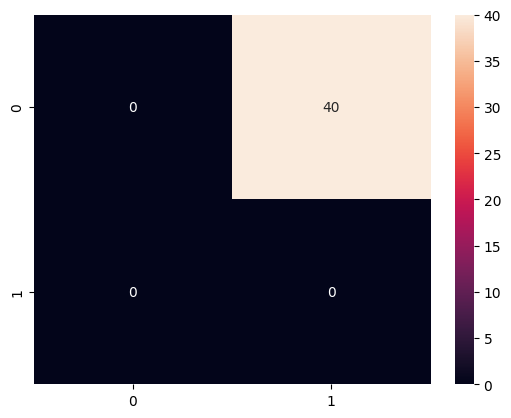

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      40.0
         1.0       0.00      0.00      0.00       0.0

    accuracy                           0.00      40.0
   macro avg       0.00      0.00      0.00      40.0
weighted avg       0.00      0.00      0.00      40.0



c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

In [ ]:
# evaluate report
from sklearn.metrics import classification_report
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
y_pred = model.predict(test_data)
y_pred = np.round(y_pred)
cm = confusion_matrix(test_sentiment, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()
print(classification_report(test_sentiment, y_pred))

In [ ]:
# save model
model.save('weight/model.h5')

In [ ]:
# load weight
# model = keras.models.load_model('./weight/model.h5')
# # save tokenizer
# tokenizer.save("weight/tokenizer.h5")
# # evaluate
# model.evaluate(test_data, test_sentiment)

In [ ]:
def predict(text, decode=False):
    text = pythai.word_tokenize(text, engine='newmm')
    text = tokenizer.texts_to_sequences([text])
    text = pad_sequences(text, maxlen=60, padding='post', truncating='post')
    predict = model.predict(text)
    rounded = np.round(predict)
    if decode:
        return 'pos' if rounded == 1 else 'neg'
    return rounded

In [ ]:
# predict
pred = predict('ห่วยแตก', decode=True)
pred

1/1 [==============================] - 0s 20ms/step


'pos'